In [ ]:
#--build basic logistic regression model with torch
#--take MNIST dataset
#---dataset
#-----read and understand the dataset
#----preprocess data -> batches of samples
#---model
#----build model
#----train model
#----evaluate the model on val and test dataset
#---inference
#----perform inference on sample images from scratch
#---WebAPP
#----build GUI webapp for sample images
#----build GUI webapp for hand drawing images
#---documentation & code base
#----push code base on git
#----documentation
#---next step
#----demo if possible

In [ ]:
#---mount gdrive to download the dataset
from google.colab import drive
drive.mount('/content/gmountdrive')

Mounted at /content/gmountdrive


In [ ]:
#--import required libraries
import torch
import torchvision

from torchvision.datasets import MNIST #--take MNIST dataset from torchvision

In [ ]:
#--import random libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#--read and understand the dataset
#--download the training data
dataset=MNIST(root='/content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset',download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 132091638.88it/s]

Extracting /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw/train-images-idx3-ubyte.gz to /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 83197591.91it/s]


Extracting /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45957041.83it/s]

Extracting /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 24708857.03it/s]


Extracting /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/raw



In [ ]:
#--only training dataset was downloaded
len(dataset)

60000

In [ ]:
#--download test dataset
test_dataset=MNIST(root='/content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset',download=True,train=False)

In [ ]:
#--understanding dataset
#--dataset -> contains both training and validation dataset
#--test_dataset -> can use to evaluate the trained model

In [ ]:
#--check dataset
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Label : 5


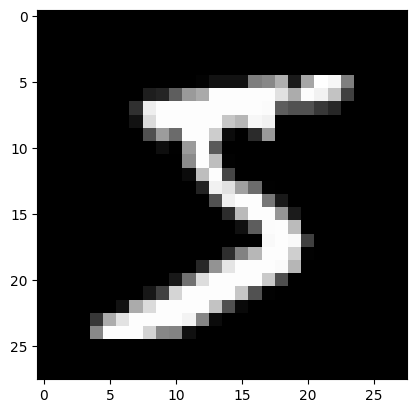

In [ ]:
#--dataset[0] -> pil formate image and corresponding label
#--visualize images
sample_image,sample_label=dataset[0]
plt.imshow(sample_image,cmap='gray')
print("Label :",sample_label)

Label : 5


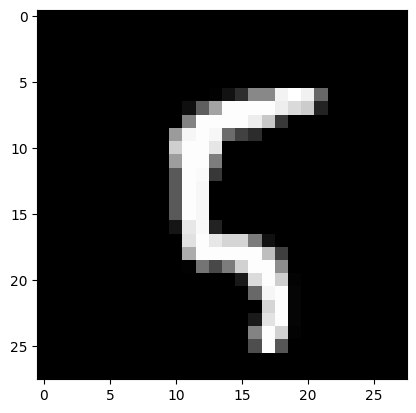

In [ ]:
#--visualize images
sample_image,sample_label=dataset[100]
plt.imshow(sample_image,cmap='gray')
print("Label :",sample_label)

In [ ]:
#--data preprocessing
#---convert these images into tensors

import torchvision.transforms as transforms

In [ ]:
dataset=MNIST(root='/content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset',
              train=True,
              transform=transforms.ToTensor())

In [ ]:
sample_image,sample_label=dataset[100]
# print(sample_image)
# print(sample_label)
print(sample_image.shape)
print(sample_label)


torch.Size([1, 28, 28])
5


Label : 5


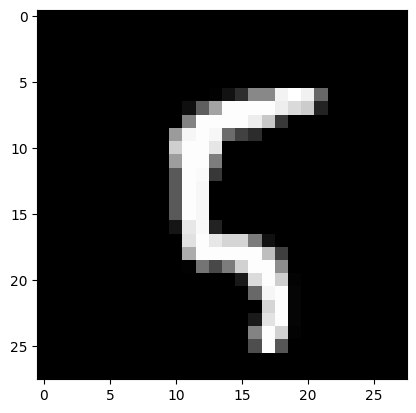

In [ ]:
#--visualize with tensors
sample_image,sample_label=dataset[100]
plt.imshow(sample_image[0,:,:],cmap='gray')
print("Label :",sample_label)

In [ ]:
#---preparing train/val/test dataset

from torch.utils.data import random_split

train_ds,val_ds=random_split(dataset,[50000,10000])
print(len(train_ds))
print(len(val_ds))

50000
10000


In [ ]:
# #--check sample, sample as of linear regression inputs and targets -> TensorDataset
# print(train_ds[0])
# print(val_ds[0])

In [ ]:
#--so basically, read mnist dataset in (pil_image, label) formate
#--apply transformation to convert to (inputs,targets) -> TensorDataset -> then we can divide into batches with help of dataloader

In [ ]:
#--prepare training data -> batches of data with dataloader

from torch.utils.data import DataLoader

batch_size=32

train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size,shuffle=True)


In [ ]:
#--each training and validation dataloader consist of batches -> they can be access with for loop

In [ ]:
#--define input and output shapes for model
input_size=28*28
num_classes=10

In [ ]:
#--define model
#--input shape [28*28] output shape [10]
#--weights shape [10,28*28]
#--bias shape [1,10]
#--y=x * w.t + b
#--y=[1,28*28] * [28*28,10] -> [1,10]

import torch.nn as nn
import torch.nn.functional as F

class mnist_model(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):

    xb = xb.reshape(-1,28*28)
    out = self.linear(xb)

    return out

model=mnist_model()

In [ ]:
print(model.linear.weight.shape)

torch.Size([10, 784])


In [ ]:
print(model.linear.bias.shape)

torch.Size([10])


In [ ]:
print(model.linear.bias)

Parameter containing:
tensor([ 0.0235,  0.0314,  0.0070, -0.0108, -0.0032, -0.0060, -0.0134, -0.0026,
         0.0287,  0.0324], requires_grad=True)


In [ ]:
#--test model with inputs
for xb,yb in train_loader:
  preds=model(xb)
  print(preds)
  break

tensor([[ 0.3682, -0.1156, -0.0126,  0.0177,  0.0315,  0.1683, -0.3515,  0.2627,
          0.1676,  0.1183],
        [ 0.3528, -0.0753, -0.1958,  0.0379,  0.0518,  0.0550, -0.1332,  0.2612,
         -0.0381, -0.0980],
        [ 0.0470,  0.1108, -0.1714,  0.0890, -0.1052,  0.3640, -0.0379,  0.3498,
         -0.0843,  0.0131],
        [ 0.0702,  0.2509, -0.1245, -0.1873, -0.3186,  0.0819, -0.2752,  0.3562,
          0.1468,  0.0062],
        [ 0.0049, -0.1369, -0.0041, -0.0586, -0.2627,  0.2791, -0.0391,  0.3351,
          0.0099, -0.1210],
        [ 0.2408, -0.1063, -0.0289, -0.1353,  0.0221,  0.0890, -0.1588,  0.3247,
          0.0545, -0.0816],
        [-0.1000, -0.1325,  0.1025, -0.0646,  0.0085, -0.0310,  0.2403,  0.0663,
         -0.1759,  0.0832],
        [ 0.0130,  0.1788,  0.2261,  0.0464, -0.1589,  0.2324, -0.1603,  0.0997,
         -0.0417, -0.0110],
        [-0.0082,  0.0883, -0.0736, -0.0851,  0.0954, -0.0286, -0.1518,  0.2064,
         -0.0173,  0.0637],
        [-0.0299,  

In [ ]:
#--apply softmax on output predictions to generate probabilities
import torch.nn.functional as F

In [ ]:
probs=F.softmax(preds,dim=1)
print(probs)

tensor([[0.1330, 0.0820, 0.0909, 0.0936, 0.0949, 0.1089, 0.0647, 0.1196, 0.1088,
         0.1036],
        [0.1373, 0.0895, 0.0793, 0.1002, 0.1016, 0.1019, 0.0845, 0.1253, 0.0929,
         0.0875],
        [0.0975, 0.1039, 0.0783, 0.1016, 0.0837, 0.1338, 0.0895, 0.1319, 0.0855,
         0.0942],
        [0.1048, 0.1256, 0.0863, 0.0810, 0.0711, 0.1061, 0.0742, 0.1395, 0.1132,
         0.0983],
        [0.0989, 0.0858, 0.0980, 0.0928, 0.0757, 0.1301, 0.0946, 0.1376, 0.0994,
         0.0872],
        [0.1230, 0.0869, 0.0939, 0.0844, 0.0988, 0.1056, 0.0825, 0.1337, 0.1021,
         0.0891],
        [0.0899, 0.0870, 0.1100, 0.0931, 0.1002, 0.0963, 0.1263, 0.1061, 0.0833,
         0.1079],
        [0.0962, 0.1136, 0.1191, 0.0995, 0.0810, 0.1198, 0.0809, 0.1049, 0.0911,
         0.0939],
        [0.0978, 0.1077, 0.0916, 0.0906, 0.1085, 0.0958, 0.0847, 0.1212, 0.0969,
         0.1051],
        [0.0907, 0.1125, 0.1455, 0.0863, 0.0752, 0.0942, 0.1057, 0.0841, 0.0931,
         0.1128],
        [0

In [ ]:
#--get the max probability value and corresponding index
max_prob,preds=torch.max(probs,dim=1)
print(max_prob)
print(preds)

tensor([0.1330, 0.1373, 0.1338, 0.1395, 0.1376, 0.1337, 0.1263, 0.1198, 0.1212,
        0.1455, 0.1384, 0.1404, 0.1224, 0.1292, 0.1279, 0.1238, 0.1250, 0.1168,
        0.1244, 0.1236, 0.1108, 0.1321, 0.1201, 0.1143, 0.1419, 0.1235, 0.1224,
        0.1249, 0.1204, 0.1660, 0.1251, 0.1310], grad_fn=<MaxBackward0>)
tensor([0, 0, 5, 7, 7, 7, 6, 5, 7, 2, 7, 7, 0, 8, 1, 7, 1, 9, 8, 7, 0, 8, 7, 0,
        8, 5, 7, 2, 4, 7, 9, 0])


In [ ]:
#--ground truth label
yb

tensor([4, 2, 1, 8, 6, 6, 0, 0, 4, 3, 8, 2, 7, 9, 3, 6, 5, 7, 4, 8, 1, 9, 9, 6,
        5, 0, 4, 5, 4, 2, 9, 4])

In [ ]:
#--check initial model performance
def acc(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
acc(probs,yb)

tensor(0.0625)

In [ ]:
#--define loss function -> cross entropy
loss_fn=F.cross_entropy

In [ ]:
#--loss for current batch
loss=loss_fn(probs,yb)
print(loss)

tensor(2.3053, grad_fn=<NllLossBackward0>)


In [ ]:
# #--training model

# for each epoch
#   #-training phase
#   #--iterrate through training data
#   #--get the pred
#   #--compute loss
#   #--compute gradients
#   #--update the weights
#   #--reset the gradient

#   #--validation phase
#   #--iterrate through val data
#   #--get the pred
#   #--compute loss
#   #--compute acc

#   #--calculate average val loss and acc

#   #--log epoch loss and metric

In [ ]:
class mnist_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,28*28)
    out=self.linear(xb)

    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images) #--generate predictions
    out=F.softmax(out,dim=1)
    loss=F.cross_entropy(out,labels)

    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    out=F.softmax(out,dim=1)
    loss=F.cross_entropy(out,labels)
    accuracy=acc(out,labels)

    return {"val_loss":loss,
            "val_acc":accuracy}

  def validation_epoch_end(self,outputs):
    batch_loss=[x['val_loss'] for x in outputs]
    batch_acc=[x['val_acc'] for x in outputs]

    epoch_loss=torch.stack(batch_loss).mean()
    epoch_acc=torch.stack(batch_acc).mean()

    return {"val_loss":epoch_loss.item(),
            "val_acc":epoch_acc.item()}


  def epoch_end(self,epoch,result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch,result['val_loss'],result['val_acc']))

model=mnist_model()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0345,  0.0156, -0.0191,  ...,  0.0150, -0.0053, -0.0189],
         [ 0.0347, -0.0250,  0.0114,  ..., -0.0180,  0.0312,  0.0116],
         [ 0.0190,  0.0160, -0.0131,  ...,  0.0120, -0.0018,  0.0223],
         ...,
         [ 0.0103, -0.0093, -0.0161,  ..., -0.0180,  0.0015,  0.0095],
         [ 0.0283, -0.0181,  0.0067,  ...,  0.0125,  0.0049,  0.0110],
         [ 0.0082, -0.0031, -0.0108,  ..., -0.0182, -0.0101,  0.0081]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0264,  0.0136, -0.0299, -0.0255,  0.0127, -0.0298,  0.0341, -0.0272,
         -0.0126,  0.0113], requires_grad=True)]

In [ ]:
#--define evaluation and training function

def evaluate(model,val_loader):
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,model,train_loader,val_loader,opt_fn):
  history=[]

  for epoch in range(epochs):
    #--training phase
    #--each batch
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      opt_fn.step()
      opt_fn.zero_grad()

    #--once training for each epoch completed
    #--run val loader
    result=evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)

  return history

In [ ]:
result0=evaluate(model,val_loader)
result0

{'val_loss': 2.3027822971343994, 'val_acc': 0.10263578593730927}

In [ ]:
opt_fn=torch.optim.SGD(model.parameters(),1e-3)
history=fit(5,model,train_loader,val_loader,opt_fn)

Epoch [0], val_loss: 1.8938, val_acc: 0.7044
Epoch [1], val_loss: 1.8793, val_acc: 0.7072
Epoch [2], val_loss: 1.8676, val_acc: 0.7088
Epoch [3], val_loss: 1.8574, val_acc: 0.7108
Epoch [4], val_loss: 1.8484, val_acc: 0.7135


In [ ]:
#--evaluate on test loader
test_dataset=MNIST(root='/content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset',
              train=False,
              transform=transforms.ToTensor())

In [ ]:
#--prepare test loader
test_dataloader=DataLoader(test_dataset,batch_size)
test_results=evaluate(model,test_dataloader)
test_results

{'val_loss': 1.8438720703125, 'val_acc': 0.71875}

image shape : torch.Size([1, 28, 28])
label : 7


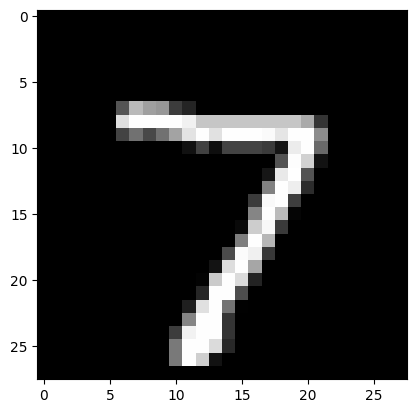

In [ ]:
#---inference on sample image
img,label=test_dataset[0]
print("image shape :",img.shape)
plt.imshow(img[0],cmap='gray')
print("label :",label)

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,pred=torch.max(yb,dim=1)
  return pred[0].item()

label : 7 predicted label : 7


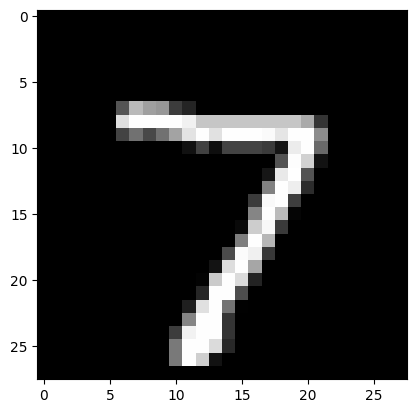

In [ ]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print("label :",label,"predicted label :",predict_image(img,model))

In [ ]:
#--saving the trained model
output_model_dir="/content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/torch_mnist_logistic_regression_model.pth"

In [ ]:
torch.save(model.state_dict(),output_model_dir)

In [ ]:
#--load the saved model
model2=mnist_model()
model2.load_state_dict(torch.load(output_model_dir))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0345,  0.0156, -0.0191,  ...,  0.0150, -0.0053, -0.0189],
                      [ 0.0347, -0.0250,  0.0114,  ..., -0.0180,  0.0312,  0.0116],
                      [ 0.0190,  0.0160, -0.0131,  ...,  0.0120, -0.0018,  0.0223],
                      ...,
                      [ 0.0103, -0.0093, -0.0161,  ..., -0.0180,  0.0015,  0.0095],
                      [ 0.0283, -0.0181,  0.0067,  ...,  0.0125,  0.0049,  0.0110],
                      [ 0.0082, -0.0031, -0.0108,  ..., -0.0182, -0.0101,  0.0081]])),
             ('linear.bias',
              tensor([ 0.0077,  0.1301, -0.0442, -0.0351,  0.0513, -0.0787,  0.0280,  0.0201,
                      -0.0735, -0.0326]))])

In [ ]:
#--prepare test loader -> to test the saved model performance
test_dataloader=DataLoader(test_dataset,batch_size)
test_results=evaluate(model2,test_dataloader)
test_results

{'val_loss': 1.8438720703125, 'val_acc': 0.71875}

In [ ]:
#---read image from dir and perform inference

image_path="/content/gmountdrive/MyDrive/Learning_AI_dataset/pytorch_dataset/dataset/MNIST/mnist_sample_image.png"

#--read image as PIL
from PIL import Image

pil_image=Image.open(image_path).convert('L')
print(pil_image)

<PIL.Image.Image image mode=L size=255x264 at 0x7F22C811E6E0>


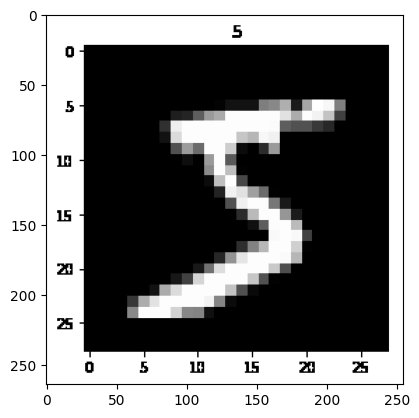

In [ ]:
#--visualize the image
plt.imshow(pil_image,cmap='gray')

In [ ]:
pil_image.size

(255, 264)

In [ ]:
pil_image=pil_image.resize((28,28),Image.Resampling.NEAREST)
pil_image.size


(28, 28)

In [ ]:
#--convert image to tensor
transform = transforms.Compose([transforms.PILToTensor()])

img = transform(pil_image)
print(img.shape)

torch.Size([1, 28, 28])


In [ ]:
def predict_raw_image(image_path,model):

  pil_image=Image.open(image_path).convert('L')
  pil_image=pil_image.resize((28,28),Image.Resampling.NEAREST)

  transform = transforms.Compose([transforms.PILToTensor()])

  img = transform(pil_image)

  xb=img.unsqueeze(0)
  xb = xb.to(torch.float32)
  yb=model(xb)
  _,pred=torch.max(yb,dim=1)

  return pred[0].item()

In [ ]:
result=predict_raw_image(image_path,model2)
print(result)

input image size : (255, 264)
input image new size : (28, 28)
input image tensor shape : torch.Size([1, 28, 28])
input image unsq tensor shape : torch.Size([1, 1, 28, 28])
7


#work flow
1. read and understand dataset -> MNIST dataset -> (pil,label) format -> need to convert to tensors with the help of torchvision.transforms -> ToTensors
2. till now we have tensors dataset -> (inputs, targets) -> divide them into train and test with random_split
3. we need to convert them into batches -> create dataloader -> from torch.utils.data import DataLoader
4. build a model
  - for each epoch
    - trainig phase
      - for each batch
        - get the predictions
        - compute loss
        - compute gradients
        - update gradients
        - reset gradients
        - calcuate training acc
    - validation phase
      - once each epoch completed for training
        - for each validation batch
          - compute predictions
          - compute loss
          - compute acc
        - average val loss and acc for each batches
    - return final average val loss and val acc


In [1]:
# #---

# class sample_mnist(nn.Module()):

#   def __init__(self):
#     super().__init__()

#     self.linear=nn.Linear(input_size,num_classes)

#   def forward(self,xb):
#     #--xb=[batch_size,1,28,28] -> [batch_size,28*28]
#     #--reshape
#     xb=xb.reshape(-1,28*28)
#     out=self.linear(xb)
#     return out

#   def training_step(self,batch): #--training step -> each iterrations -> processing each mini-batch -> get the predictions -> calculcate loss
#     images,labels=batch
#     preds=self(images)
#     preds=F.softmax(preds,dim=1)
#     loss=loss_fn(preds,labels)

#     return loss

#   def validation_step(self,batch):
#     images,labels=batch
#     preds=self(images)
#     preds=F.softmax(preds,dim=1)
#     val_loss=loss_fn(preds,labels)
#     val_acc=acc(preds,labels)

#     return {
#         "val_acc":val_acc,
#         "val_loss":val_loss
#     }

#   def validation_epoch_end(self,outputs):
#     batch_loss=[x['val_loss'] for x in outputs]
#     batch_acc=[x['val_acc'] for x in outputs]

#     epoch_loss=torch.stack(batch_loss).mean()
#     epoch_acc=torch.stack(batch_acc).mean()

#     return {
#           "val_acc":epoch_loss.item(),
#           "val_loss":epoch_acc.item()
#       }



In [2]:
# def evaluate(model,val_dataloader):
#   outputs=[model.validation_step(batch) for batch in val_dataloader] #--accumulate accross each mini-batch
#   return model.validation_epoch_end(outputs) #--get average accross all mini-batch

In [3]:
# def fit(epochs,model,train_dataloader,val_dataloader,opt):

#   #--iterrate through each epoch -> each batch -> perform training step -> get loss -> compute gradients -> update weights -> reset gradients
#   for epoch in range(epochs):
#     #--perform training step
#     for batch in train_dataloader:
#       loss=model.training_step(batch)
#       loss.backward()
#       opt.step()
#       opt.zero_grad()

#     #--once training for each epoch complete -> perform validation step
#     result=evaluate(model,val_dataloader)